# Implementación de PCA en NumPy

## Objetivos
* Implementación de PCA en NumPy paso a paso
* Comparación de resultados con Scikit-learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

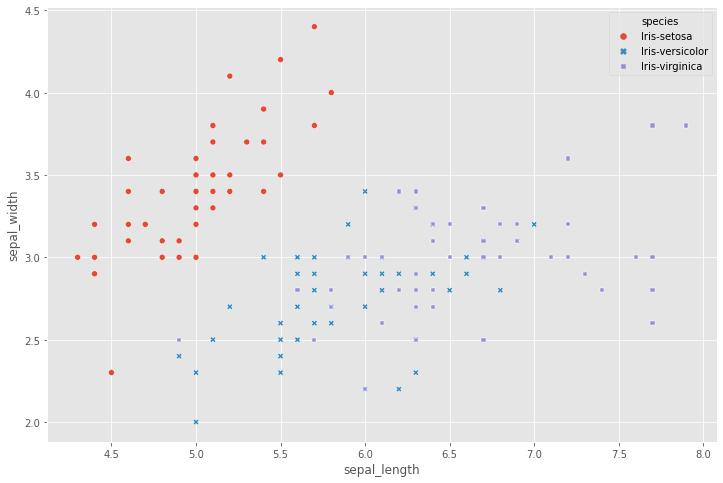

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

In [4]:
a = iris.iloc[:, 0:4].values
print(a.shape)
print(a)

(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

## Implementación

1. Dado un dataset $X \in \mathbb{R}^{n, d}$, con $n$ muestras y $d$ features, queremos reducir sus dimensiones a $m$. Para ello, el primer paso es centrar el dataset (Hint: usen np.mean)

In [6]:
# INSERTAR CÓDIGO AQUI
rows = a.shape[0]
columns = a.shape[1]

aux_prev_mean = []
aux_mean = []

aux_prev_std = []
aux_std = []

for i in range(columns):
    aux_a = a[:, i]
    for ii in aux_a:
        aux_prev_mean.append(ii)
        aux_prev_std.append(ii)
    mean = np.mean(aux_prev_mean)
    std = np.std(aux_prev_std)
    
    aux_mean.append(mean)
    aux_std.append(std)
    
    aux_prev_mean.clear()
    aux_prev_std.clear()

contador = 0
for u in range(columns):
    a[:, u] = (a[:,u]-aux_mean[contador])/aux_std[contador]
    
        

In [7]:
a

array([[-0.90068117, -2.8393671 , -5.38389238, -6.83790682],
       [-1.14301691, -3.44520645, -5.38389238, -6.83790682],
       [-1.38535265, -3.20287071, -5.50506025, -6.83790682],
       [-1.50652052, -3.32403858, -5.26272451, -6.83790682],
       [-1.02184904, -2.71819923, -5.38389238, -6.83790682],
       [-0.53717756, -2.35469562, -5.02038877, -6.59557108],
       [-1.50652052, -2.96053497, -5.38389238, -6.71673895],
       [-1.02184904, -2.96053497, -5.26272451, -6.83790682],
       [-1.74885626, -3.56637432, -5.38389238, -6.83790682],
       [-1.14301691, -3.32403858, -5.26272451, -6.95907469],
       [-0.53717756, -2.59703136, -5.26272451, -6.83790682],
       [-1.26418478, -2.96053497, -5.14155664, -6.83790682],
       [-1.26418478, -3.44520645, -5.38389238, -6.95907469],
       [-1.87002413, -3.44520645, -5.74739599, -6.95907469],
       [-0.05250608, -2.23352775, -5.62622812, -6.83790682],
       [-0.17367395, -1.74885626, -5.26272451, -6.59557108],
       [-0.53717756, -2.

2. Obtener la matriz de covarianza de $X^T$, revisar en la teoría por qué utilizamos la transpuesta. Buscar en la documentación de NumPy qué funciones se pueden utilizar.

In [8]:
# INSERTAR CÓDIGO AQUÍ
print(a)

[[-0.90068117 -2.8393671  -5.38389238 -6.83790682]
 [-1.14301691 -3.44520645 -5.38389238 -6.83790682]
 [-1.38535265 -3.20287071 -5.50506025 -6.83790682]
 [-1.50652052 -3.32403858 -5.26272451 -6.83790682]
 [-1.02184904 -2.71819923 -5.38389238 -6.83790682]
 [-0.53717756 -2.35469562 -5.02038877 -6.59557108]
 [-1.50652052 -2.96053497 -5.38389238 -6.71673895]
 [-1.02184904 -2.96053497 -5.26272451 -6.83790682]
 [-1.74885626 -3.56637432 -5.38389238 -6.83790682]
 [-1.14301691 -3.32403858 -5.26272451 -6.95907469]
 [-0.53717756 -2.59703136 -5.26272451 -6.83790682]
 [-1.26418478 -2.96053497 -5.14155664 -6.83790682]
 [-1.26418478 -3.44520645 -5.38389238 -6.95907469]
 [-1.87002413 -3.44520645 -5.74739599 -6.95907469]
 [-0.05250608 -2.23352775 -5.62622812 -6.83790682]
 [-0.17367395 -1.74885626 -5.26272451 -6.59557108]
 [-0.53717756 -2.35469562 -5.50506025 -6.59557108]
 [-0.90068117 -2.8393671  -5.38389238 -6.71673895]
 [-0.17367395 -2.47586349 -5.02038877 -6.71673895]
 [-0.90068117 -2.47586349 -5.26

In [9]:
print(a.shape)

(150, 4)


In [10]:
a_T = a.T
data = []
for i in range(4):
    data.append(a_T[:,i])
data = np.array(data)

In [11]:
data.shape

(4, 4)

In [12]:
covm = np.cov(data,bias=False)
print (covm)

[[6.97378509 6.49173749 6.39141286 6.10756758]
 [6.49173749 6.09166245 5.95341022 5.70382212]
 [6.39141286 5.95341022 5.85797948 5.59860361]
 [6.10756758 5.70382212 5.59860361 5.36859105]]


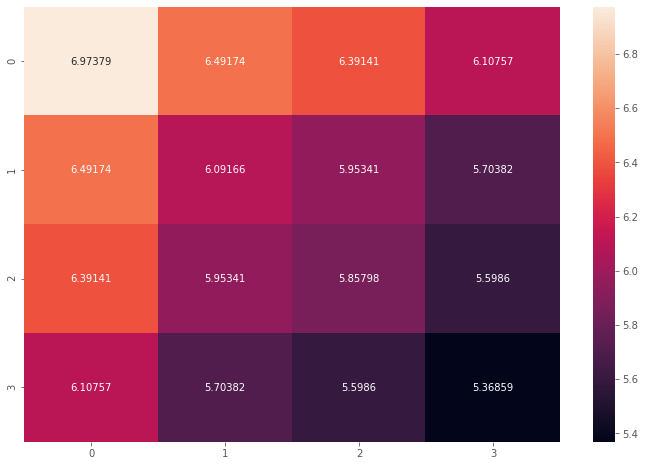

In [13]:
sns.heatmap(covm, annot=True, fmt='g')
plt.show()

3. Calcular los autovalores y autovectores de la matriz de covarianza. Revisar la documentación de NumPy.

In [14]:
# INSERTAR CÓDIGO AQUÍ
eigenval, eigenvec = la.eig(covm)


In [15]:
print(eigenval)

[ 2.42510028e+01+0.j  3.10428491e-02+0.j -1.68405693e-15+0.j
  9.97242575e-03+0.j]


In [16]:
print(eigenvec)

[[-0.53594712 -0.48950914 -0.64998061 -0.22509264]
 [-0.50033874  0.7933919  -0.06717125 -0.34011537]
 [-0.49129599 -0.35241396  0.75666436 -0.24878044]
 [-0.47015964  0.08194211  0.02173187  0.8785005 ]]


4. Ordernar los autovectores en el sentido de los autovalores decrecientes, revisar la teoría de ser necesario.

In [20]:
# INSERTAR CÓDIGO AQUÍ
idx = np.argsort(eigenval)[::-1]
eigenval = eigenval[idx]
eigenvec = eigenvec[:,idx]

In [21]:
eigenval

array([ 2.42510028e+01+0.j,  3.10428491e-02+0.j,  9.97242575e-03+0.j,
       -1.68405693e-15+0.j])

5. Proyectar el dataset centrado sobre los $m$ autovectores más relevantes (Hint: usen np.dot).

In [23]:
# INSERTAR CÓDIGO AQUÍ
#varianza por cada componente
varxcomp = []
for i in eigenval:
     varxcomp.append((i/sum(eigenval))*100)
        
print(varxcomp)

[(99.83115740042061+0j), (0.1277903258609692+0j), (0.04105227371842147+0j), (-6.9325525961061295e-15+0j)]


Decidí usar las dos primeras

In [34]:
projection_matrix = (eigenvec.T[:][:2]).T
print(projection_matrix)

[[-0.53594712 -0.48950914]
 [-0.50033874  0.7933919 ]
 [-0.49129599 -0.35241396]
 [-0.47015964  0.08194211]]


In [35]:
X_pca = a.dot(projection_matrix)
print(X_pca)

[[ 7.76335535 -0.47479285]
 [ 8.19635939 -0.83683532]
 [ 8.26451786 -0.4832413 ]
 [ 8.27102384 -0.60546463]
 [ 7.76766994 -0.31934646]
 [ 7.03351237 -0.37644301]
 [ 8.09170994 -0.26443381]
 [ 7.82939062 -0.55431493]
 [ 8.58168223 -0.63640503]
 [ 8.13317337 -0.79333172]
 [ 7.38775739 -0.50316523]
 [ 7.89974047 -0.47839061]
 [ 8.31826721 -0.78745129]
 [ 8.82155293 -0.36278365]
 [ 7.12471204 -0.32391178]
 [ 6.65462734  0.01168918]
 [ 7.27162953 -0.20563802]
 [ 7.70638711 -0.4648641 ]
 [ 6.95628688 -0.66044371]
 [ 7.46498288 -0.21916453]
 [ 7.45057376 -0.87696854]
 [ 7.46863962 -0.30536939]
 [ 8.26554538  0.08870965]
 [ 7.53511272 -0.76537756]
 [ 7.7211526  -0.60649436]
 [ 8.01236125 -0.9815506 ]
 [ 7.65592484 -0.57715867]
 [ 7.63888649 -0.57680688]
 [ 7.75904076 -0.63023924]
 [ 8.08593    -0.61134505]
 [ 8.08161541 -0.76679143]
 [ 7.45569585 -0.77170854]
 [ 7.33210486 -0.00993399]
 [ 7.07922221 -0.03910872]
 [ 8.13317337 -0.79333172]
 [ 8.12922844 -0.61847839]
 [ 7.56312636 -0.66934272]
 

6. Consolidar los pasos anteriores en una función o clase PCA.

In [ ]:
# INSERTAR CÓDIGO AQUÍ

7. Comparar los resultados obtenidos con el modelo de PCA implementado en Scikit-learn ([ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Tomar como dataset:

$X=\begin{bmatrix}
0.8 & 0.7\\
0.1 & -0.1
\end{bmatrix}$

Se debe reducir a un componente. Verificar los resultados con np.testing.assert_allclose

In [ ]:
# INSERTAR CÓDIGO AQUÍ